In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys

In [5]:
nih_results=pd.read_csv("data/nih_results.csv",low_memory=False,index_col=0)

In [39]:
nih_results_wo_zeros = nih_results[["max_n_fem", "max_n_male",
             "final_cost"]][(nih_results["final_cost"] != 0)
                            & (~(nih_results["max_n_fem"]).isna()) &
                            (~(nih_results["max_n_male"]).isna())]
print("nih_results_wo_zeros.shape:",nih_results_wo_zeros.shape)
nih_results_with_zeros = nih_results[["max_n_fem", "max_n_male",
             "final_cost"]][(~(nih_results["max_n_fem"]).isna()) &
                            (~(nih_results["max_n_male"]).isna())]
print("nih_results_with_zeros.shape:",nih_results_with_zeros.shape)

nih_results_wo_zeros.shape: (7135, 3)
nih_results_with_zeros.shape: (28357, 3)


In [43]:
fem_mal_ratio = nih_results_wo_zeros["max_n_fem"].astype(float)/nih_results_wo_zeros["max_n_male"].astype(float)
fem_mal_ratio

50        8.000000
51        8.000000
52        8.000000
368       1.285714
388       0.666667
            ...   
213360    0.750000
213361    0.750000
213368    0.972973
213370    0.972973
213576    0.294118
Length: 7135, dtype: float64

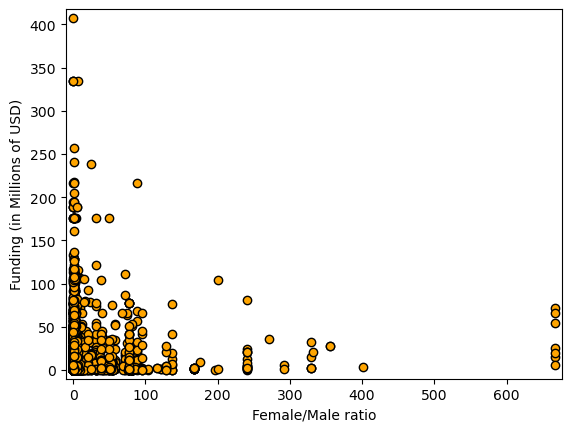

In [84]:
plt.scatter(fem_mal_ratio,
            nih_results_wo_zeros["final_cost"].astype(float)/1e6,
            edgecolors="k",c="orange"
           )
plt.xlim([-10,fem_mal_ratio[fem_mal_ratio != np.inf].max()+10])
plt.ylim([-10,(nih_results_wo_zeros["final_cost"].astype(float)/1e6).max()+10])
plt.xlabel("Female/Male ratio")
plt.ylabel("Funding (in Millions of USD)")
plt.show()

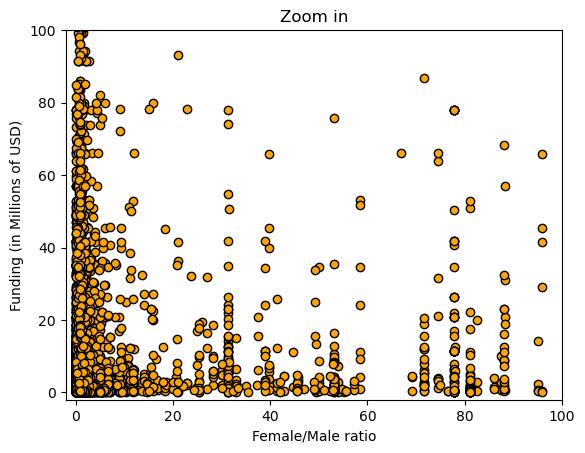

In [117]:
plt.scatter(fem_mal_ratio,
            nih_results_wo_zeros["final_cost"].astype(float)/1e6,
            edgecolors="k",c="orange"
           )
plt.xlim([-2,100])
plt.ylim([-2,100])
plt.xlabel("Female/Male ratio")
plt.ylabel("Funding (in Millions of USD)")
plt.title("Zoom in")
plt.show()

In [98]:
males_no_zeros=nih_results_wo_zeros["max_n_male"].astype(float).values[nih_results_wo_zeros["max_n_male"].astype(float).values!=0]
males_no_zeros.shape

(7111,)

In [99]:
cost_males_no_zeros=(nih_results_wo_zeros["final_cost"].astype(float)/1e6).values[nih_results_wo_zeros["max_n_male"].astype(float).values!=0]
cost_males_no_zeros.shape

(7111,)

In [102]:
funding_per_male = cost_males_no_zeros/males_no_zeros
funding_per_male

array([1.07104500e+00, 3.65868300e+00, 6.13508400e+00, ...,
       2.20074338e-01, 4.95428378e-03, 3.19287294e-01])

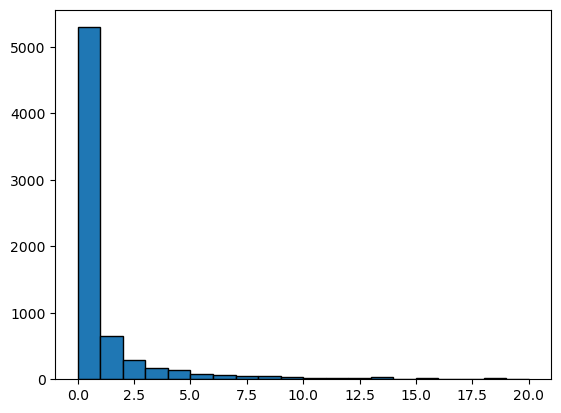

In [113]:
plt.hist(funding_per_male,bins=20,edgecolor="k",range=(0,20));

In [107]:
females_no_zeros=nih_results_wo_zeros["max_n_fem"].astype(float).values[nih_results_wo_zeros["max_n_fem"].astype(float).values!=0]

cost_females_no_zeros=(nih_results_wo_zeros["final_cost"].astype(float)/1e6).values[nih_results_wo_zeros["max_n_fem"].astype(float).values!=0]

funding_per_female = cost_females_no_zeros/females_no_zeros

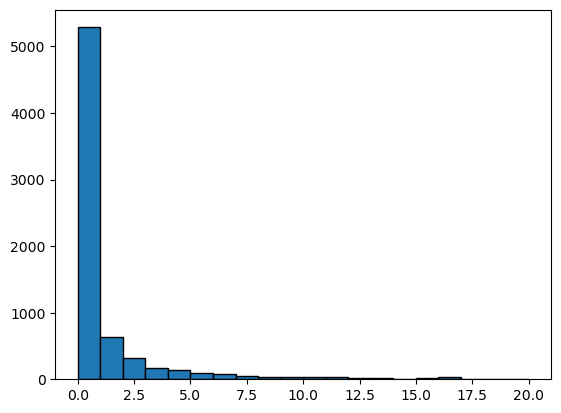

In [114]:
plt.hist(funding_per_female,bins=20,edgecolor="k",range=(0,20));